## Projeto - Análise Multivariada

<p align="left"/> Aluno: Tales Nobre Leite Dias de Oliveira - Matrícula: 20200025983 </p>
<p align="left"/> Professor: Sérgio Bezerra </p>

#### Importando Bibliotecas

In [3114]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#### Pré-Processamento e Tratamento dos dados

In [3115]:
df = pd.read_csv("data/House_Rent_Dataset.csv")
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


##### Excluí essas 2 colunas por não terem muita correlação com os outros dados e não serem necessárias para a análise.

In [3116]:
df.drop(['Posted On', 'Area Locality'], axis=1, inplace=True)
df

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1 out of 4,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23 out of 34,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3117]:
df.dtypes

BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [3118]:
### Exclusão de Outlier
df = df.drop(df[df['Area Type'] == 'Built Area'].index)

In [3119]:
### Extração e transformação do número de andares, de variável categórica, se tornou numérica.
df.Floor = df['Floor'].str.extract('(\d+)')
df.isnull().sum()
df.dropna(inplace=True)
df.Floor = df.Floor.astype(int)

In [3120]:
df

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


##### Remoção de Outliers

In [3121]:
max_out = df[df['Rent'] > 250000].index
min_out = df[(df['Rent'] < 5000)].index

df.drop(max_out, inplace=True)
df.drop(min_out, inplace=True)

##### Normalização dos dados, deixei cada cidade com 400 dados, para não haver discrepância entre elas.

In [3122]:
df["City"].value_counts()

Mumbai       913
Chennai      876
Bangalore    869
Hyderabad    855
Delhi        590
Kolkata      491
Name: City, dtype: int64

In [3123]:
grouped = df.groupby('City')

In [3124]:
df = grouped.apply(lambda x: x.sample(min(len(x), 400))).reset_index(drop=True)
df

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,1,10000,600,3,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Owner
1,3,21500,1320,3,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
2,3,50000,1580,3,Carpet Area,Bangalore,Unfurnished,Bachelors,3,Contact Agent
3,2,11000,600,2,Carpet Area,Bangalore,Unfurnished,Bachelors,1,Contact Owner
4,4,60000,2500,1,Super Area,Bangalore,Semi-Furnished,Family,4,Contact Owner
...,...,...,...,...,...,...,...,...,...,...
2395,2,250000,1300,10,Carpet Area,Mumbai,Furnished,Bachelors/Family,2,Contact Agent
2396,1,17500,400,4,Carpet Area,Mumbai,Unfurnished,Bachelors/Family,1,Contact Agent
2397,3,140000,937,28,Carpet Area,Mumbai,Unfurnished,Family,4,Contact Agent
2398,4,45000,1016,3,Carpet Area,Mumbai,Unfurnished,Bachelors/Family,3,Contact Agent


In [3125]:
df["City"].value_counts()

Bangalore    400
Chennai      400
Delhi        400
Hyderabad    400
Kolkata      400
Mumbai       400
Name: City, dtype: int64

##### Transformando todas as variáveis categóricas em numéricas, utilizando o LabelEncoder

In [3126]:
def cat_var(df): 
    col_type = df.dtypes
    col_names = list(df)
    cat_var_index = [i for i, x in enumerate(col_type) if x=='object']
    cat_var_name = [x for i, x in enumerate(col_names) if i in cat_var_index]
    return cat_var_name

def column_encoder(df, cat_var_list):
    label_list = []
    for cat_feature in cat_var_list: 
        le = LabelEncoder()
        le.fit(df[cat_feature])    
        label_list.append(list(le.classes_))
        df[cat_feature] = le.transform(df[cat_feature])
    return df, label_list

cat_var_list = cat_var(df)
df_encoded, label_list = column_encoder(df, cat_var_list)


In [3127]:
print("Mean House Rent:", round(df["Rent"].mean()))

print("Median House Rent:", round(df["Rent"].median()))

print("Highest House Rent:", round(df["Rent"].max()))

print("Lowest House Rent:", round(df["Rent"].min()))

Mean House Rent: 28354
Median House Rent: 15000
Highest House Rent: 250000
Lowest House Rent: 5000


##### Separando os dados em treino e teste

In [3128]:
def split_to_train_test(df, label_column, train_frac=0.8):
    train_df, test_df = pd.DataFrame(), pd.DataFrame()
    labels = df[label_column].unique()
    for lbl in labels:
        lbl_df = df[df[label_column] == lbl]
        lbl_train_df = lbl_df.sample(frac=train_frac)
        lbl_test_df = lbl_df.drop(lbl_train_df.index)
        train_df = train_df.append(lbl_train_df)
        test_df = test_df.append(lbl_test_df)

    return train_df, test_df

In [3129]:
train_df, test_df = split_to_train_test(df, 'City', train_frac=0.8)

X_train = train_df.drop('Rent', axis=1)
y_train = train_df['Rent']

X_test = test_df.drop('Rent', axis=1)
y_test = test_df['Rent']

C:\Users\tales\AppData\Local\Temp\ipykernel_2036\2978623824.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\tales\AppData\Local\Temp\ipykernel_2036\2978623824.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\tales\AppData\Local\Temp\ipykernel_2036\2978623824.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\tales\AppData\Local\Temp\ipykernel_2036\2978623824.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\tales\AppData\Local\Temp\ipykernel_2036\2978623824.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [3130]:
X_train

,BHK,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
126,1,500,3,1,0,1,1,1,2
39,4,4105,11,0,0,1,1,4,0
105,1,400,3,0,0,1,1,1,2
118,2,1000,1,1,0,1,1,2,2
63,2,1025,3,1,0,1,2,2,2
...,...,...,...,...,...,...,...,...,...
2015,1,500,4,0,5,0,0,1,0
2011,2,751,16,0,5,1,1,2,0
2267,2,950,4,1,5,0,1,2,2
2257,2,900,7,0,5,1,0,2,0


In [3131]:
X_train.dtypes

BHK                  int64
Size                 int64
Floor                int32
Area Type            int32
City                 int32
Furnishing Status    int32
Tenant Preferred     int32
Bathroom             int64
Point of Contact     int32
dtype: object

#### Estimativa da amostra com 480 valores (Usando Linear Regression)

In [3132]:
model = LinearRegression(positive=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred = np.abs(y_pred)

y_pred

array([4.65517918e+03, 1.37138896e+04, 3.54924947e+03, 1.34121693e+04,
       1.22208845e+04, 7.11828314e+03, 4.65517918e+03, 1.59257490e+04,
       2.74504006e+03, 1.67299585e+04, 1.67299585e+04, 8.98628248e+04,
       7.24191941e+04, 1.09490654e+04, 5.98229482e+03, 4.95689947e+03,
       4.90642373e+03, 7.97296828e+03, 5.76110888e+03, 3.66110317e+04,
       1.37138896e+04, 1.37695845e+03, 1.67299585e+04, 6.91751431e+03,
       2.00477476e+04, 5.45938859e+03, 1.63911036e+03, 3.83196914e+04,
       1.59257490e+04, 4.33430243e+04, 2.53357930e+04, 3.97739906e+04,
       1.36634139e+04, 5.72749041e+02, 1.34422280e+04, 1.97460273e+04,
       2.02989921e+04, 1.59257490e+04, 3.85096977e+03, 1.15020302e+04,
       4.08294446e+04, 1.56240288e+04, 1.19843738e+04, 1.92231210e+04,
       1.94443070e+04, 1.59257490e+04, 1.53727842e+04, 2.84634491e+04,
       1.48198193e+04, 1.56240288e+04, 4.35345888e+03, 4.95689947e+03,
       3.50990273e+04, 1.17532748e+04, 1.09490654e+04, 1.42115580e+04,
      

In [3133]:
model.score(X_train, y_train)

0.502613594767259

In [3134]:
r2_score(y_test, y_pred)

0.5393365879657444

In [3135]:
# param_grid = {
#     'regressor__fit_intercept': [True, False]
# }

# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('regressor', LinearRegression())
# ])

# kfold = KFold(n_splits=10, random_state=42, shuffle=True)

# grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kfold, scoring='r2')

# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)

# best_r2 = r2_score(y_test, y_pred)

# print(f"Melhor r2_score: {best_r2}")

In [3136]:
# joblib.dump(best_model, 'best_linear_regression_model.pkl')

In [3137]:
best_model = joblib.load('best_linear_regression_model.pkl')

y_pred = best_model.predict(X_test)

r2_score(y_test, y_pred)

0.8531245636623008

In [3138]:
dfc = pd.DataFrame({'Valor Real': y_test, 'Valor Previsto': y_pred.astype(int)})
dfc['Index'] = dfc.index

dfc

,Valor Real,Valor Previsto,Index
3,11000,10503,3
8,15000,15105,8
16,12000,10128,16
17,15000,11937,17
21,12000,16631,21
...,...,...,...
2378,48000,53298,2378
2386,75000,95204,2386
2388,23000,28973,2388
2390,72000,65137,2390


In [3139]:
px.line(dfc, x='Index', y=['Valor Real', 'Valor Previsto'], color='variable', symbol='variable', title='Linear Regressor', labels={'value': 'Valor do Imóvel','Index':'ID'})

#### Estimativa da amostra com 480 valores (Random Forest Regression)

In [3140]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

array([  8831.57142857,  16365.5       ,  10073.42857143,  14460.        ,
        16790.        ,  14710.        ,  10148.20238095,  15511.66666667,
         9767.10119048,  18159.        ,  13896.5       , 157900.        ,
        83290.        ,  12331.33333333,   9484.83333333,  16848.33333333,
         9598.5       ,   6955.        ,   8678.41666667,  30710.        ,
        16365.5       ,  11065.        ,  13896.5       ,   8845.        ,
        20880.        ,  10884.        ,   7989.58333333,  36130.        ,
        20805.        ,  35330.        ,  24386.81      ,  56250.85714286,
        14285.        ,   9528.75      ,  11308.33333333,  15455.        ,
        25180.83333333,  15511.66666667,   8397.08333333,  16125.        ,
        44145.        ,  16585.83333333,  11602.5       ,  22504.99      ,
        15903.        ,  25965.        ,  16519.25      ,  15165.        ,
        14979.78571429,  16385.83333333,  23539.75      ,  13850.75      ,
        48745.        ,  

In [3141]:
model.score(X_train, y_train)

0.9587364270892271

In [3142]:
r2_score(y_test,y_pred)

0.8221736191896195

In [3172]:
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# kfold = KFold(n_splits=10, random_state=42, shuffle=True)

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='r2')

# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)

# best_r2 = r2_score(y_test, y_pred)

# print(f"Melhor r2_score: {best_r2}")

In [3144]:
# joblib.dump(best_model, 'best_random_forest_model.pkl')

In [3145]:
best_model = joblib.load('best_random_forest_model.pkl')

y_pred = best_model.predict(X_test)

r2_score(y_test, y_pred)

0.8531245636623008

In [3146]:
dfc = pd.DataFrame({'Valor Real': y_test, 'Valor Previsto': y_pred.astype(int)})
dfc['Index'] = dfc.index

dfc

,Valor Real,Valor Previsto,Index
3,11000,10503,3
8,15000,15105,8
16,12000,10128,16
17,15000,11937,17
21,12000,16631,21
...,...,...,...
2378,48000,53298,2378
2386,75000,95204,2386
2388,23000,28973,2388
2390,72000,65137,2390


In [3147]:
px.line(dfc, x='Index', y=['Valor Real', 'Valor Previsto'], color='variable', symbol='variable', title='Random Forest Regressor', labels={ 'value': 'Valor do Imóvel','Index':'ID'})

#### Análise de Componentes Principais (PCA)

In [3148]:
label = df['Rent']
df_normalizado = df.drop(columns=['Rent'])
df_normalizado = (df_normalizado - df_normalizado.mean()) / df_normalizado.std()
pca = PCA(n_components=2)
pca.fit(df_normalizado)
df_pca = pd.DataFrame(pca.transform(df_normalizado), columns=['PC1', 'PC2'])

In [3149]:
df_pca

,PC1,PC2
0,-2.033062,0.836650
1,0.351183,2.063428
2,2.038984,0.096713
3,-1.337189,-0.141738
4,3.059736,3.867324
...,...,...
2395,1.743686,-1.999276
2396,-0.910062,-2.736863
2397,3.902805,-2.316956
2398,2.572577,-0.953821


In [3150]:
df_pca_label = pd.concat([df_pca, label], axis=1)
df_pca_label.columns = ['PC1', 'PC2', 'target']
df_pca_label

,PC1,PC2,target
0,-2.033062,0.836650,10000
1,0.351183,2.063428,21500
2,2.038984,0.096713,50000
3,-1.337189,-0.141738,11000
4,3.059736,3.867324,60000
...,...,...,...
2395,1.743686,-1.999276,250000
2396,-0.910062,-2.736863,17500
2397,3.902805,-2.316956,140000
2398,2.572577,-0.953821,45000


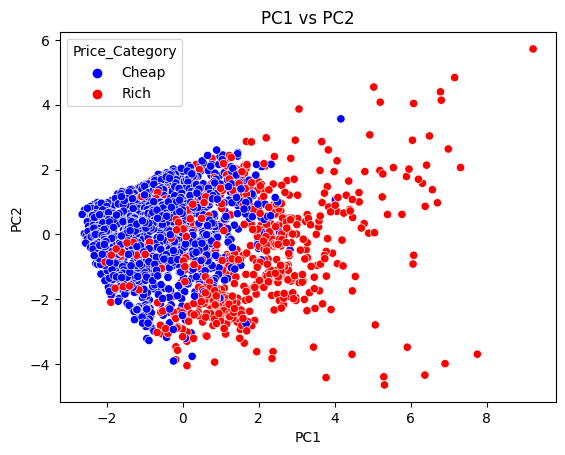

In [3151]:
price = 28000

df_pca_label['Price_Category'] = ['Cheap' if target <= price else 'Rich' for target in df_pca_label['target']]

sns.scatterplot(data=df_pca_label, x='PC1', y='PC2', hue='Price_Category', palette=['blue', 'red'])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')

plt.show()

c:\Users\tales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



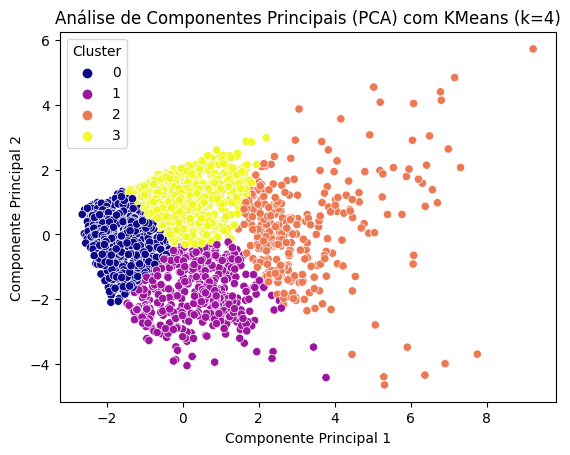

In [3152]:
km = KMeans(n_clusters=4, random_state=42)
labels_kmeans = km.fit_predict(df_pca)
df_pca_kmeans = pd.concat([df_pca, pd.DataFrame(labels_kmeans, columns=['Cluster'])], axis=1)

sns.scatterplot(data=df_pca_kmeans, x='PC1', y='PC2', hue='Cluster', palette='plasma')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de Componentes Principais (PCA) com KMeans (k=4)')

plt.show()

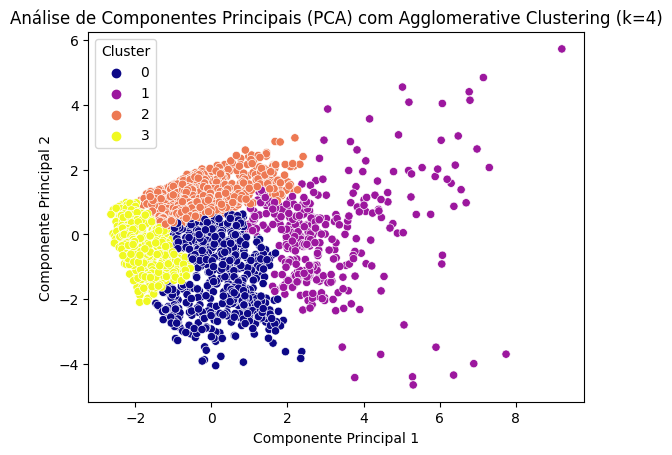

In [3153]:
agg = AgglomerativeClustering(n_clusters=4)
labels_agg = agg.fit_predict(df_pca)
df_pca_agg = pd.concat([df_pca, pd.DataFrame(labels_agg, columns=['Cluster'])], axis=1)

sns.scatterplot(data=df_pca_agg, x='PC1', y='PC2', hue='Cluster', palette='plasma')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de Componentes Principais (PCA) com Agglomerative Clustering (k=4)')

plt.show()

c:\Users\tales\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



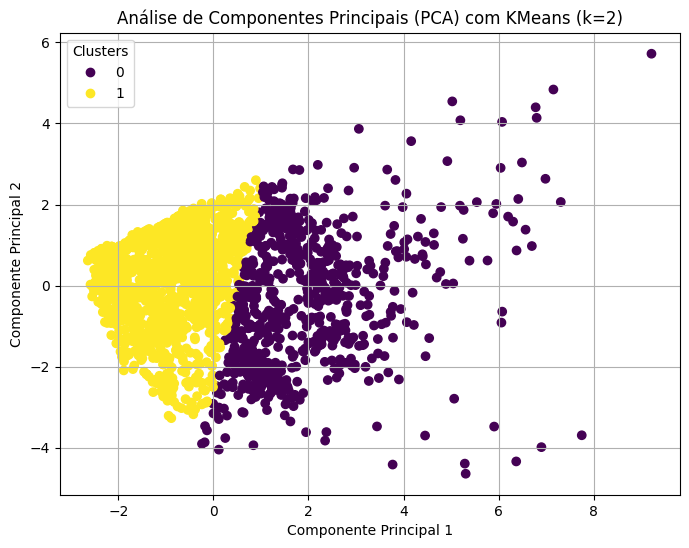

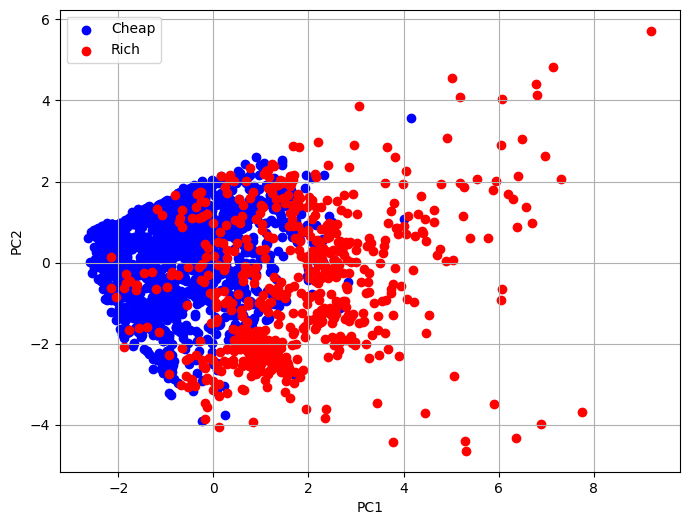

In [3154]:
km = KMeans(n_clusters=2, random_state=42)
labels_kmeans = km.fit_predict(df_pca)
df_pca_kmeans = pd.concat([df_pca, pd.DataFrame(labels_kmeans)], axis=1)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca_kmeans['PC1'], df_pca_kmeans['PC2'], c=df_pca_kmeans[0], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de Componentes Principais (PCA) com KMeans (k=2)')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_label[df_pca_label['target'] <= price]['PC1'], df_pca_label[df_pca_label['target'] <= price]['PC2'], color='blue', label='Cheap')
plt.scatter(df_pca_label[df_pca_label['target'] > price]['PC1'], df_pca_label[df_pca_label['target'] > price]['PC2'], color='red', label='Rich')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()

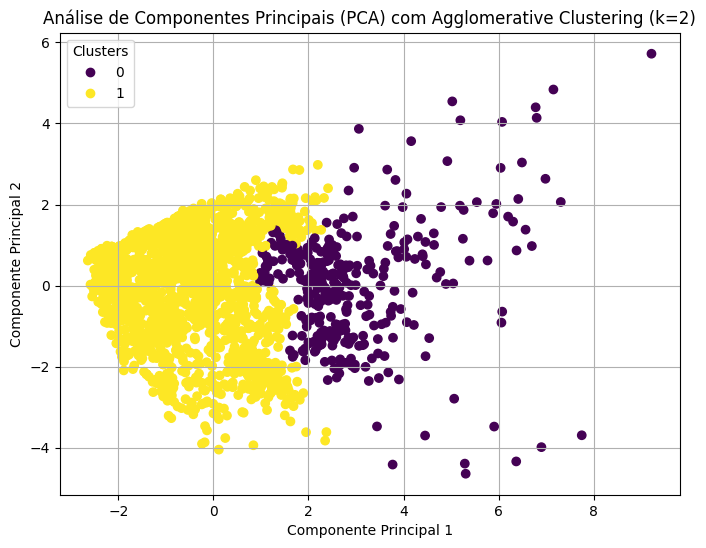

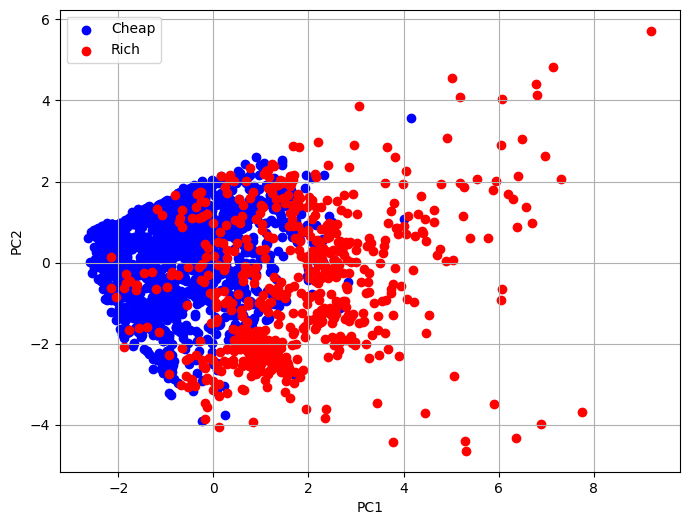

In [3155]:
agg = AgglomerativeClustering(n_clusters=2)
labels_agg = agg.fit_predict(df_pca)
labels_agg = np.where(labels_agg == 0, 1, 0)
df_pca_agg = pd.concat([df_pca, pd.DataFrame(labels_agg)], axis=1)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca_agg['PC1'], df_pca_agg['PC2'], c=df_pca_agg[0], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de Componentes Principais (PCA) com Agglomerative Clustering (k=2)')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_label[df_pca_label['target'] <= price]['PC1'], df_pca_label[df_pca_label['target'] <= price]['PC2'], color='blue', label='Cheap')
plt.scatter(df_pca_label[df_pca_label['target'] > price]['PC1'], df_pca_label[df_pca_label['target'] > price]['PC2'], color='red', label='Rich')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()

#### Análise de Correspondência

In [3156]:
df.corr()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
BHK,1.000000,0.448080,0.657879,0.144871,-0.085375,-0.008945,-0.087088,0.054214,0.756401,-0.187160
Rent,0.448080,1.000000,0.483851,0.451011,-0.275260,0.281265,-0.210242,0.044947,0.594242,-0.516142
Size,0.657879,0.483851,1.000000,0.116440,-0.015136,-0.095464,-0.131536,0.036801,0.717139,-0.173151
Floor,0.144871,0.451011,0.116440,1.000000,-0.197959,0.278574,-0.069585,0.125765,0.249920,-0.356340
Area Type,-0.085375,-0.275260,-0.015136,-0.197959,1.000000,-0.249597,0.044126,0.186593,-0.115002,0.514998
City,-0.008945,0.281265,-0.095464,0.278574,-0.249597,1.000000,0.042126,0.010161,0.009979,-0.284336
Furnishing Status,-0.087088,-0.210242,-0.131536,-0.069585,0.044126,0.042126,1.000000,-0.076020,-0.152357,0.118022
Tenant Preferred,0.054214,0.044947,0.036801,0.125765,0.186593,0.010161,-0.076020,1.000000,0.059660,0.076351
Bathroom,0.756401,0.594242,0.717139,0.249920,-0.115002,0.009979,-0.152357,0.059660,1.000000,-0.298809
Point of Contact,-0.187160,-0.516142,-0.173151,-0.356340,0.514998,-0.284336,0.118022,0.076351,-0.298809,1.000000


In [3157]:
columns = ['Rent', 'Size', 'Floor']

In [3158]:
dfac = df[columns]

In [3159]:
df[columns].describe()

,Rent,Size,Floor
count,2400.000000,2400.000000,2400.000000
mean,28354.012083,941.578333,3.575000
std,35332.926720,614.643365,5.092087
min,5000.000000,10.000000,1.000000
25%,10000.000000,550.000000,1.000000
50%,15000.000000,825.000000,2.000000
75%,30000.000000,1200.000000,4.000000
max,250000.000000,8000.000000,65.000000


In [3160]:
def cat_rent(Rent):
    if Rent <= 12000:
       return '0'
    elif Rent < 25000:
       return '1'
    else:
        return '2'
dfac['Valor'] = dfac['Rent'].apply(cat_rent)

C:\Users\tales\AppData\Local\Temp\ipykernel_2036\1850514413.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3161]:
dfac.Size.value_counts()

1000    143
600     118
800     115
1200    100
700      93
       ... 
446       1
545       1
55        1
48        1
1016      1
Name: Size, Length: 413, dtype: int64

In [3162]:
def cat_size(Size):
    if Size <= 650:
       return '0'
    elif Size < 1100:
       return '1'
    else:
        return '2'
dfac['Tamanho'] = dfac['Size'].apply(cat_size)

C:\Users\tales\AppData\Local\Temp\ipykernel_2036\2449014727.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3163]:
dfac.Tamanho.value_counts()

0    840
1    805
2    755
Name: Tamanho, dtype: int64

In [3164]:
def cat_floor(Floor):
    if Floor <= 2:
       return '0'
    elif Floor < 5:
       return '1'
    else:
        return '2'
dfac['Andar'] = dfac['Floor'].apply(cat_floor)

C:\Users\tales\AppData\Local\Temp\ipykernel_2036\3166717109.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3165]:
dfac.Andar.value_counts()

0    1415
1     591
2     394
Name: Andar, dtype: int64

In [3166]:
dfac

,Rent,Size,Floor,Valor,Tamanho,Andar
0,10000,600,3,0,0,1
1,21500,1320,3,1,2,1
2,50000,1580,3,2,2,1
3,11000,600,2,0,0,0
4,60000,2500,1,2,2,0
...,...,...,...,...,...,...
2395,250000,1300,10,2,2,2
2396,17500,400,4,1,0,1
2397,140000,937,28,2,1,2
2398,45000,1016,3,2,1,1


In [3167]:
def matriz_contingencia(dataframe, coluna1, coluna2):
 matriz_contingencia = pd.crosstab(dataframe[coluna1], dataframe[coluna2])
 return matriz_contingencia

In [3168]:
matriz_contingencia(dfac, 'Valor', 'Tamanho')

Tamanho,0,1,2
Valor,,,
0,493,322,87
1,199,282,241
2,148,201,427


In [3169]:
matriz_contingencia(dfac, 'Valor', 'Andar')

Andar,0,1,2
Valor,,,
0,680,197,25
1,462,210,50
2,273,184,319


In [3170]:
matriz_contingencia(dfac, 'Tamanho', 'Andar')

Andar,0,1,2
Tamanho,,,
0,516,223,101
1,497,185,123
2,402,183,170
